### next goal: Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

###### When we run this cell, the output is a zip object in memory.
The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

###### note: You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

###### Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the list of tuples and find the nearest city to those coordinates.

we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module. and for that we need citypy installed in python data powershell.

In [4]:
# adding/importing the python script from github repository on the citypy and city finder:

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

### Problem: cells above 
(api practice, section 6.1.5 and pythondata environment problems)

In [6]:
import requests
requests.__version__

'2.25.1'

In [7]:
###### retrieving the weather data from 500+ cities.
We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
   City, country, and date
   Latitude and longitude
   Maximum temperature
   Humidity
   Cloudiness
   Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

SyntaxError: invalid syntax (<ipython-input-7-955811b7610f>, line 2)

In [9]:
# Import the requests library.
import requests

# Import the API key.
from configDONTSHAREGITHUB import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f7c58016ee71425c83a56c2d00ab365


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | nogales
Processing Record 2 of Set 13 | qaqortoq
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | namibe
Processing Record 5 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | iqaluit
Processing Record 8 of Set 13 | punta arenas
Processing Record 9 of Set 13 | butaritari
Processing Record 10 of Set 13 | darhan
Processing Record 11 of Set 13 | kamyshevatskaya
Processing Record 12 of Set 13 | harper
Processing Record 13 of Set 13 | avarua
Processing Record 14 of Set 13 | warman
Processing Record 15 of Set 13 | nioro
Processing Record 16 of Set 13 | dikson
Processing Record 17 of Set 13 | iskateley
Processing Record 18 of Set 13 | codrington
Processing Record 19 of Set 13 | colomi
Processing Record 20 of Set 13 | kaitangata
Processing Record 21 of Set 13 | atuona
Processing Record 22 of Set 13 | berlevag
P

Processing Record 33 of Set 16 | cavalcante
Processing Record 34 of Set 16 | sandwick
Processing Record 35 of Set 16 | torbay
Processing Record 36 of Set 16 | turukhansk
Processing Record 37 of Set 16 | amahai
Processing Record 38 of Set 16 | lock haven
Processing Record 39 of Set 16 | touros
Processing Record 40 of Set 16 | alugan
Processing Record 41 of Set 16 | gornopravdinsk
Processing Record 42 of Set 16 | lolua
City not found. Skipping...
Processing Record 43 of Set 16 | oistins
Processing Record 44 of Set 16 | mahebourg
Processing Record 45 of Set 16 | pontes e lacerda
Processing Record 46 of Set 16 | choma
Processing Record 47 of Set 16 | norman wells
Processing Record 48 of Set 16 | barreirinha
Processing Record 49 of Set 16 | oussouye
Processing Record 50 of Set 16 | castro
Processing Record 1 of Set 17 | wajir
Processing Record 2 of Set 17 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 17 | lazaro cardenas
Processing Record 4 of Set 17 | cumaribo
City not 

Processing Record 17 of Set 20 | la ronge
Processing Record 18 of Set 20 | havoysund
Processing Record 19 of Set 20 | vanimo
Processing Record 20 of Set 20 | ewa beach
Processing Record 21 of Set 20 | tambura
Processing Record 22 of Set 20 | karkaralinsk
City not found. Skipping...
Processing Record 23 of Set 20 | donskoye
Processing Record 24 of Set 20 | beringovskiy
Processing Record 25 of Set 20 | swift current
Processing Record 26 of Set 20 | svarstad
Processing Record 27 of Set 20 | alenquer
Processing Record 28 of Set 20 | ninghai
Processing Record 29 of Set 20 | yulara
Processing Record 30 of Set 20 | kathu
Processing Record 31 of Set 20 | impfondo
Processing Record 32 of Set 20 | alofi
Processing Record 33 of Set 20 | parana
Processing Record 34 of Set 20 | sangar
Processing Record 35 of Set 20 | poum
Processing Record 36 of Set 20 | honningsvag
Processing Record 37 of Set 20 | yangjiang
Processing Record 38 of Set 20 | perth
Processing Record 39 of Set 20 | kheri
Processing Re

Processing Record 2 of Set 24 | kaduqli
Processing Record 3 of Set 24 | broken hill
Processing Record 4 of Set 24 | oruro
Processing Record 5 of Set 24 | machado
Processing Record 6 of Set 24 | guane
Processing Record 7 of Set 24 | kajaani
Processing Record 8 of Set 24 | perry
Processing Record 9 of Set 24 | gimbi
Processing Record 10 of Set 24 | ambulu
Processing Record 11 of Set 24 | matara
Processing Record 12 of Set 24 | vilcun
Processing Record 13 of Set 24 | half moon bay
Processing Record 14 of Set 24 | yuxia
Processing Record 15 of Set 24 | alekseyevsk
Processing Record 16 of Set 24 | iralaya
Processing Record 17 of Set 24 | nanding
Processing Record 18 of Set 24 | raudeberg
Processing Record 19 of Set 24 | bilma
Processing Record 20 of Set 24 | quatre cocos
Processing Record 21 of Set 24 | nguiu
City not found. Skipping...
Processing Record 22 of Set 24 | yining
Processing Record 23 of Set 24 | acajutla
Processing Record 24 of Set 24 | cayenne
Processing Record 25 of Set 24 | 

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nogales
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | darhan
Processing Record 11 of Set 1 | kamyshevatskaya
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | warman
Processing Record 15 of Set 1 | nioro
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | colomi
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | berlevag
Processing Record 23 of

Processing Record 38 of Set 4 | lock haven
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | alugan
Processing Record 41 of Set 4 | gornopravdinsk
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | oistins
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | pontes e lacerda
Processing Record 46 of Set 4 | choma
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | barreirinha
Processing Record 49 of Set 4 | oussouye
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | wajir
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | lazaro cardenas
Processing Record 4 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | toliary
City not found. Skipping...
Processing Record 8 of Set 5 | ambatondrazaka
Processing Re

Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | kathu
Processing Record 31 of Set 8 | impfondo
Processing Record 32 of Set 8 | alofi
Processing Record 33 of Set 8 | parana
Processing Record 34 of Set 8 | sangar
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | honningsvag
Processing Record 37 of Set 8 | yangjiang
Processing Record 38 of Set 8 | perth
Processing Record 39 of Set 8 | kheri
Processing Record 40 of Set 8 | utiroa
City not found. Skipping...
Processing Record 41 of Set 8 | college
Processing Record 42 of Set 8 | soyo
Processing Record 43 of Set 8 | pochutla
Processing Record 44 of Set 8 | aron
Processing Record 45 of Set 8 | kavieng
Processing Record 46 of Set 8 | antissa
City not found. Skipping...
Processing Record 47 of Set 8 | tomelloso
Processing Record 48 of Set 8 | yinchuan
Processing Record 49 of Set 8 | kropotkin
Processing Record 50 of Set 8 | najran
Processing Record 1 of Set 9 | columbia
Processing Record 2 of Set 9 | bo

Processing Record 17 of Set 12 | nanding
Processing Record 18 of Set 12 | raudeberg
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | quatre cocos
Processing Record 21 of Set 12 | nguiu
City not found. Skipping...
Processing Record 22 of Set 12 | yining
Processing Record 23 of Set 12 | acajutla
Processing Record 24 of Set 12 | cayenne
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | gucheng
Processing Record 27 of Set 12 | riviere-du-loup
Processing Record 28 of Set 12 | eureka
Processing Record 29 of Set 12 | sale
Processing Record 30 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 31 of Set 12 | kushima
Processing Record 32 of Set 12 | navalmoral de la mata
Processing Record 33 of Set 12 | the pas
Processing Record 34 of Set 12 | weyburn
Processing Record 35 of Set 12 | ulaangom
Processing Record 36 of Set 12 | chimore
Processing Record 37 of Set 12 | peniche
Processing Record 38 of Set 12 | hami
Processing Record 39 of 

In [14]:
# tally the number of cities with the formula below:
len(city_data)

553

--> next steps:  converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nogales,31.3086,-110.9422,81.48,26,1,14.97,MX,2021-10-10 00:07:25
1,Qaqortoq,60.7167,-46.0333,30.70,54,17,5.41,GL,2021-10-10 00:10:31
2,Bluff,-46.6000,168.3333,64.80,58,62,2.57,NZ,2021-10-10 00:10:31
3,Namibe,-15.1961,12.1522,64.13,79,7,3.27,AO,2021-10-10 00:10:32
4,Rikitea,-23.1203,-134.9692,74.50,81,94,17.52,PF,2021-10-10 00:10:32
5,Iqaluit,63.7506,-68.5145,34.70,93,98,4.00,CA,2021-10-10 00:10:13
6,Punta Arenas,-53.1500,-70.9167,42.91,87,75,23.02,CL,2021-10-10 00:07:15
7,Butaritari,3.0707,172.7902,81.59,73,92,12.37,KI,2021-10-10 00:10:33
8,Darhan,49.4867,105.9228,33.80,60,1,6.35,MN,2021-10-10 00:10:33
9,Kamyshevatskaya,46.4132,37.9563,52.20,43,99,19.26,RU,2021-10-10 00:10:34


In [16]:
# new column order:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(17)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nogales,MX,2021-10-10 00:07:25,31.3086,-110.9422,81.48,26,1,14.97
1,Qaqortoq,GL,2021-10-10 00:10:31,60.7167,-46.0333,30.70,54,17,5.41
2,Bluff,NZ,2021-10-10 00:10:31,-46.6000,168.3333,64.80,58,62,2.57
3,Namibe,AO,2021-10-10 00:10:32,-15.1961,12.1522,64.13,79,7,3.27
4,Rikitea,PF,2021-10-10 00:10:32,-23.1203,-134.9692,74.50,81,94,17.52
5,Iqaluit,CA,2021-10-10 00:10:13,63.7506,-68.5145,34.70,93,98,4.00
6,Punta Arenas,CL,2021-10-10 00:07:15,-53.1500,-70.9167,42.91,87,75,23.02
7,Butaritari,KI,2021-10-10 00:10:33,3.0707,172.7902,81.59,73,92,12.37
8,Darhan,MN,2021-10-10 00:10:33,49.4867,105.9228,33.80,60,1,6.35
9,Kamyshevatskaya,RU,2021-10-10 00:10:34,46.4132,37.9563,52.20,43,99,19.26


Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file. 

In our World_Weather_Analysis folder, create a new folder called "weather_data." Add the following code to a new cell, run the cell, then confirm your CSV file is in the folder.

In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

 If we run this code there will be no output until we call the function with five parameters.

To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.



In [19]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13 

City                        Nioro
Country                        GM
Date          2021-10-10 00:10:35
Lat                         13.35
Lng                        -15.75
Max Temp                    77.81
Humidity                       86
Cloudiness                     99
Wind Speed                   5.44
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
548     True
549     True
550     True
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nogales,MX,2021-10-10 00:07:25,31.3086,-110.9422,81.48,26,1,14.97
1,Qaqortoq,GL,2021-10-10 00:10:31,60.7167,-46.0333,30.70,54,17,5.41
5,Iqaluit,CA,2021-10-10 00:10:13,63.7506,-68.5145,34.70,93,98,4.00
7,Butaritari,KI,2021-10-10 00:10:33,3.0707,172.7902,81.59,73,92,12.37
8,Darhan,MN,2021-10-10 00:10:33,49.4867,105.9228,33.80,60,1,6.35
...,...,...,...,...,...,...,...,...,...
548,Mana,GF,2021-10-10 00:13:46,5.6592,-53.7767,81.82,81,100,12.12
549,Surt,LY,2021-10-10 00:13:47,31.2089,16.5887,75.69,77,52,14.56
550,Sande,DE,2021-10-10 00:13:47,53.5049,8.0142,47.01,72,78,7.70
551,Malysheva,RU,2021-10-10 00:13:48,57.1185,61.4035,39.18,90,93,4.81


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nogales,MX,2021-10-10 00:07:25,31.3086,-110.9422,81.48,26,1,14.97
1,Qaqortoq,GL,2021-10-10 00:10:31,60.7167,-46.0333,30.70,54,17,5.41
5,Iqaluit,CA,2021-10-10 00:10:13,63.7506,-68.5145,34.70,93,98,4.00
7,Butaritari,KI,2021-10-10 00:10:33,3.0707,172.7902,81.59,73,92,12.37
8,Darhan,MN,2021-10-10 00:10:33,49.4867,105.9228,33.80,60,1,6.35


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nogales,MX,2021-10-10 00:07:25,31.3086,-110.9422,81.48,26,1,14.97
1,Qaqortoq,GL,2021-10-10 00:10:31,60.7167,-46.0333,30.70,54,17,5.41
5,Iqaluit,CA,2021-10-10 00:10:13,63.7506,-68.5145,34.70,93,98,4.00
7,Butaritari,KI,2021-10-10 00:10:33,3.0707,172.7902,81.59,73,92,12.37
8,Darhan,MN,2021-10-10 00:10:33,49.4867,105.9228,33.80,60,1,6.35
...,...,...,...,...,...,...,...,...,...
548,Mana,GF,2021-10-10 00:13:46,5.6592,-53.7767,81.82,81,100,12.12
549,Surt,LY,2021-10-10 00:13:47,31.2089,16.5887,75.69,77,52,14.56
550,Sande,DE,2021-10-10 00:13:47,53.5049,8.0142,47.01,72,78,7.70
551,Malysheva,RU,2021-10-10 00:13:48,57.1185,61.4035,39.18,90,93,4.81


In [25]:
# Create Northern and Southern Hemisphere DataFrames.

southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bluff,NZ,2021-10-10 00:10:31,-46.6000,168.3333,64.80,58,62,2.57
3,Namibe,AO,2021-10-10 00:10:32,-15.1961,12.1522,64.13,79,7,3.27
4,Rikitea,PF,2021-10-10 00:10:32,-23.1203,-134.9692,74.50,81,94,17.52
6,Punta Arenas,CL,2021-10-10 00:07:15,-53.1500,-70.9167,42.91,87,75,23.02
11,Avarua,CK,2021-10-10 00:05:53,-21.2078,-159.7750,78.85,57,40,8.05
...,...,...,...,...,...,...,...,...,...
523,Quatre Cocos,MU,2021-10-10 00:13:37,-20.2078,57.7625,72.09,77,9,16.17
537,Chimore,BO,2021-10-10 00:13:42,-16.9833,-65.1333,79.52,73,100,2.75
542,Majene,ID,2021-10-10 00:13:44,-3.5403,118.9707,80.69,80,100,8.61
545,Amuntai,ID,2021-10-10 00:13:45,-2.4177,115.2494,81.30,76,87,2.10


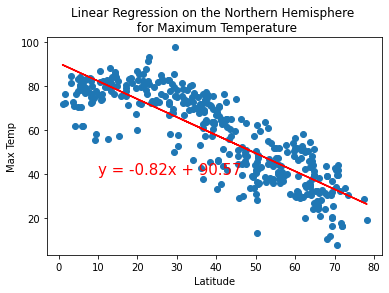

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [36]:
linregress(x_values,y_values)

LinregressResult(slope=-0.8219742413346679, intercept=90.57201751599554, rvalue=-0.8454771709888521, pvalue=6.18871965116787e-104, stderr=0.026845480722904408, intercept_stderr=1.1985670463680536)

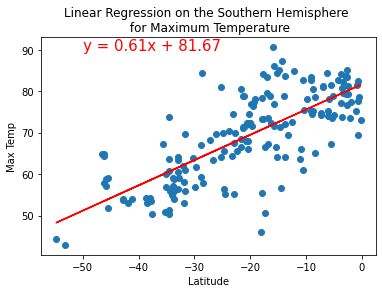

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-50,90))

In [41]:
linregress(x_values,y_values)

LinregressResult(slope=0.6095053958578966, intercept=81.66949974766474, rvalue=0.7489832788047759, pvalue=4.179803682144036e-33, stderr=0.040759660992218116, intercept_stderr=0.9945980761297258)

the Correlation Between Latitude and Percent Humidity

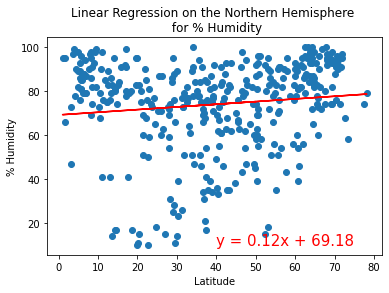

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [43]:
linregress(x_values,y_values)

LinregressResult(slope=0.12142718721168239, intercept=69.18057306451601, rvalue=0.11956968463225867, pvalue=0.020386995554315807, stderr=0.05213532788170568, intercept_stderr=2.3276799024608965)

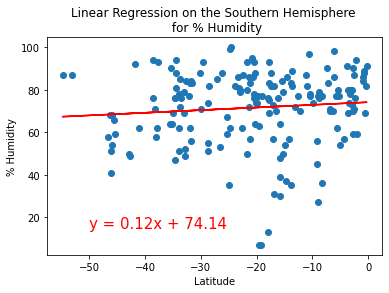

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [45]:
linregress(x_values,y_values)

LinregressResult(slope=0.12405357256513128, intercept=74.14130296015165, rvalue=0.0930896767837762, pvalue=0.2178069361828446, stderr=0.10029950697328642, intercept_stderr=2.447461393053209)

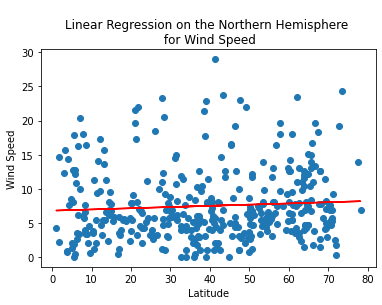

In [46]:
# the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [47]:
linregress(x_values,y_values)

LinregressResult(slope=0.017643155840626236, intercept=6.7859175773245415, rvalue=0.0689147329455982, pvalue=0.18238656973394604, stderr=0.013206710272794657, intercept_stderr=0.5896384530151774)

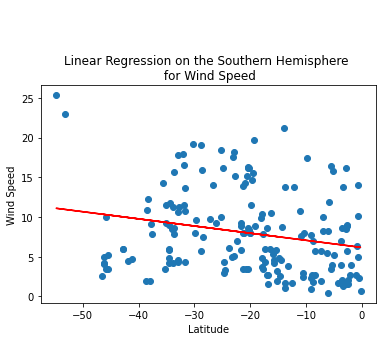

LinregressResult(slope=-0.08993677920103228, intercept=6.168784313720075, rvalue=-0.22476974731970603, pvalue=0.002631786978250059, stderr=0.029472910841952957, intercept_stderr=0.7191841077124257)

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
linregress(x_values,y_values)

In [ ]:
# Set Up Google Maps and Places API
